In [6]:
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
from tqdm import tqdm
import pandas as pd
tqdm.pandas(ascii=True)

import tensorflow as tf 
import os
os.environ["CUDA_VISIBLE_DEVICES"]="6"


In [7]:
from molmap import loadmap
from tensorflow.keras.models import load_model

## Input feature maps

In [8]:
smiles = ['CC(=O)OC1=CC=CC=C1C(O)=O']
mp = loadmap('../../../descriptor_grid_split.mp')
X = mp.batch_transform(smiles, n_jobs = 2)

100%|##########| 1/1 [00:00<00:00, 167.94it/s]


## The model

In [9]:
model = load_model('./solubility_MMND.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.layers[1].weights

[<tf.Variable 'conv2d/kernel:0' shape=(13, 13, 13, 48) dtype=float32>,
 <tf.Variable 'conv2d/bias:0' shape=(48,) dtype=float32>]

In [11]:
X.shape

(1, 37, 37, 13)

In [12]:
l1 = model.layers[1].get_weights()[0][:,:,0,:]

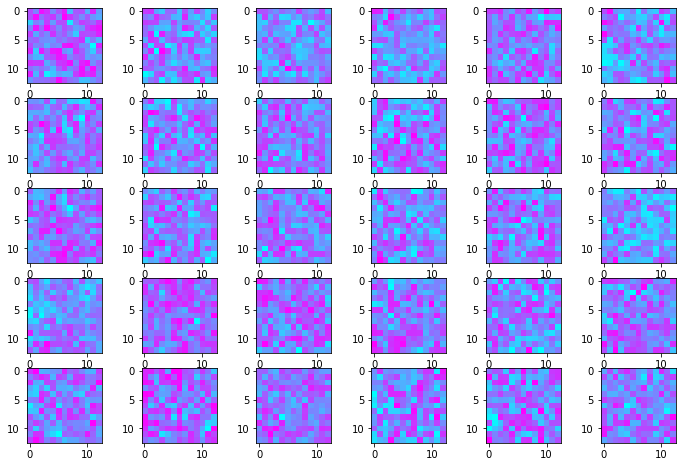

In [58]:
col_size = 6
row_size = 5
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
    for col in range(0,col_size):
        ax[row][col].imshow(l1[:,:,filter_index],cmap="cool")
        filter_index += 1

In [70]:
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers][1:]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X, batch_size = 1)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size): 
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='rainbow')
            activation_index += 1

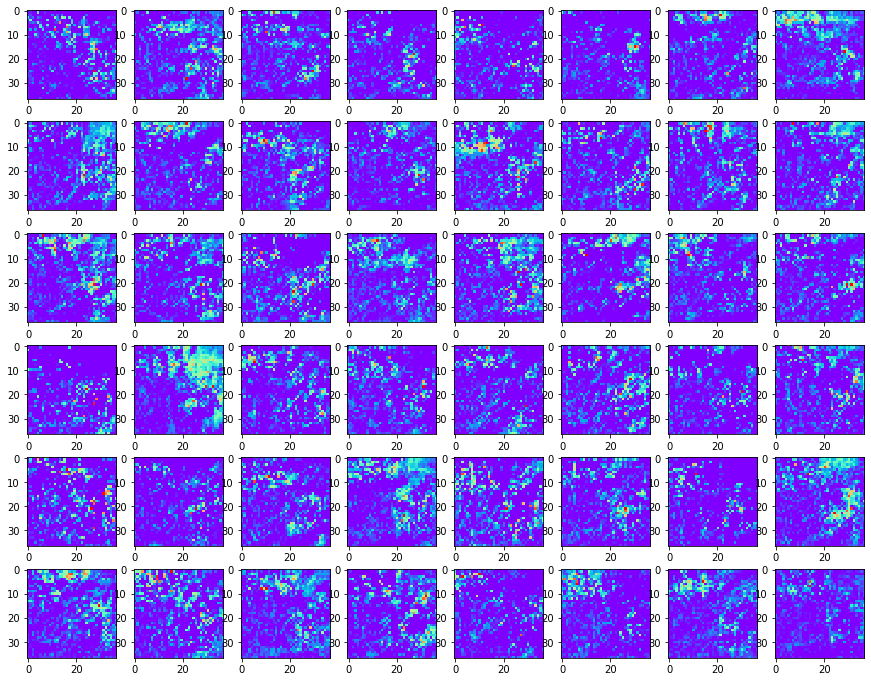

In [71]:
display_activation(activations, 8, 6, 0)

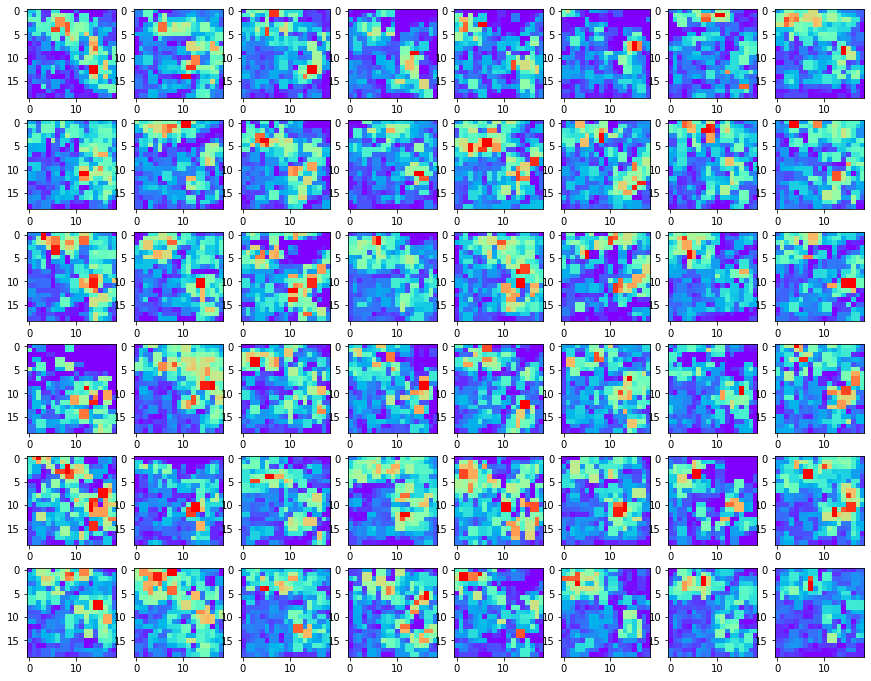

In [72]:
display_activation(activations, 8, 6, 1)

IndexError: index 32 is out of bounds for axis 3 with size 32

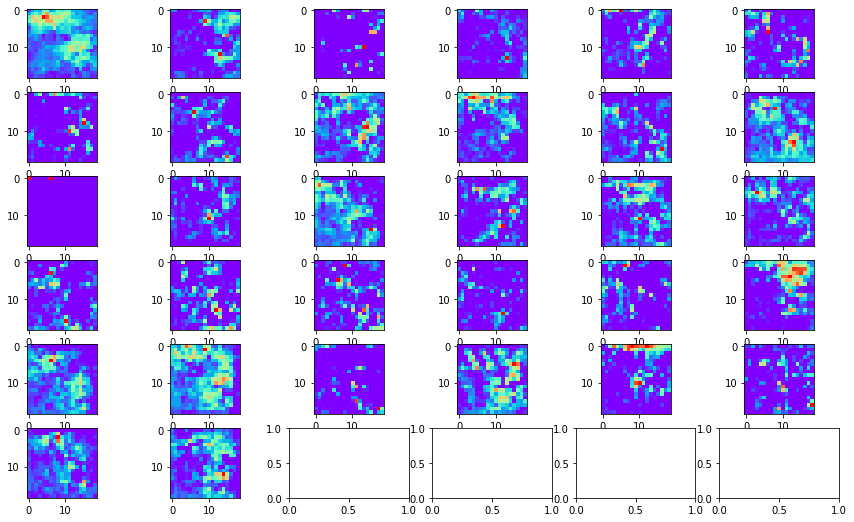

In [76]:
display_activation(activations, 6, 6, 2)

IndexError: index 32 is out of bounds for axis 3 with size 32

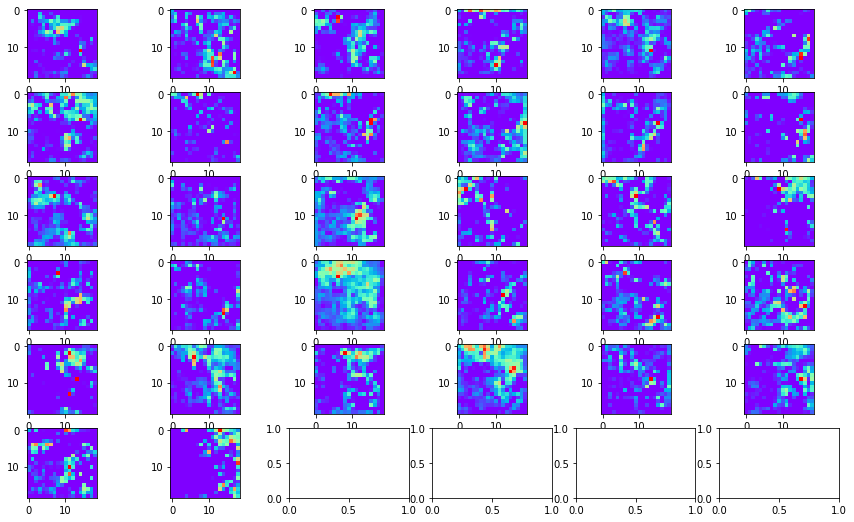

In [77]:
display_activation(activations, 6, 6, 3)

IndexError: index 32 is out of bounds for axis 3 with size 32

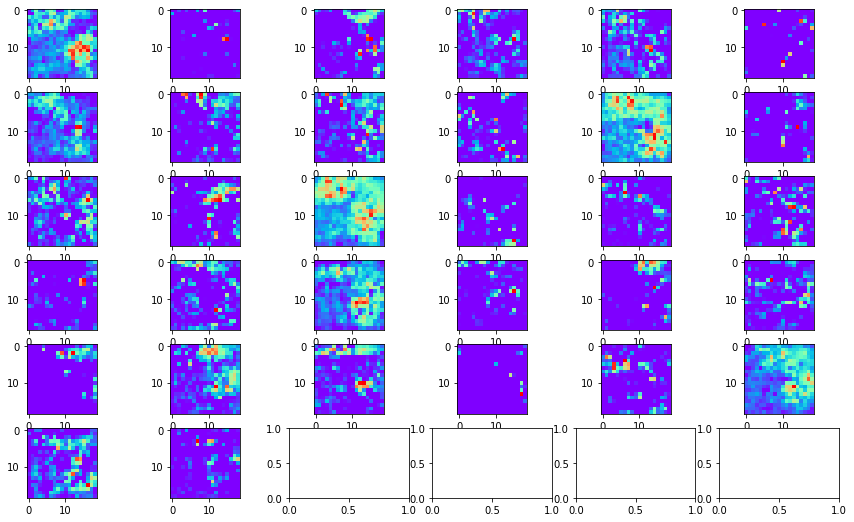

In [78]:
display_activation(activations, 6, 6, 4)

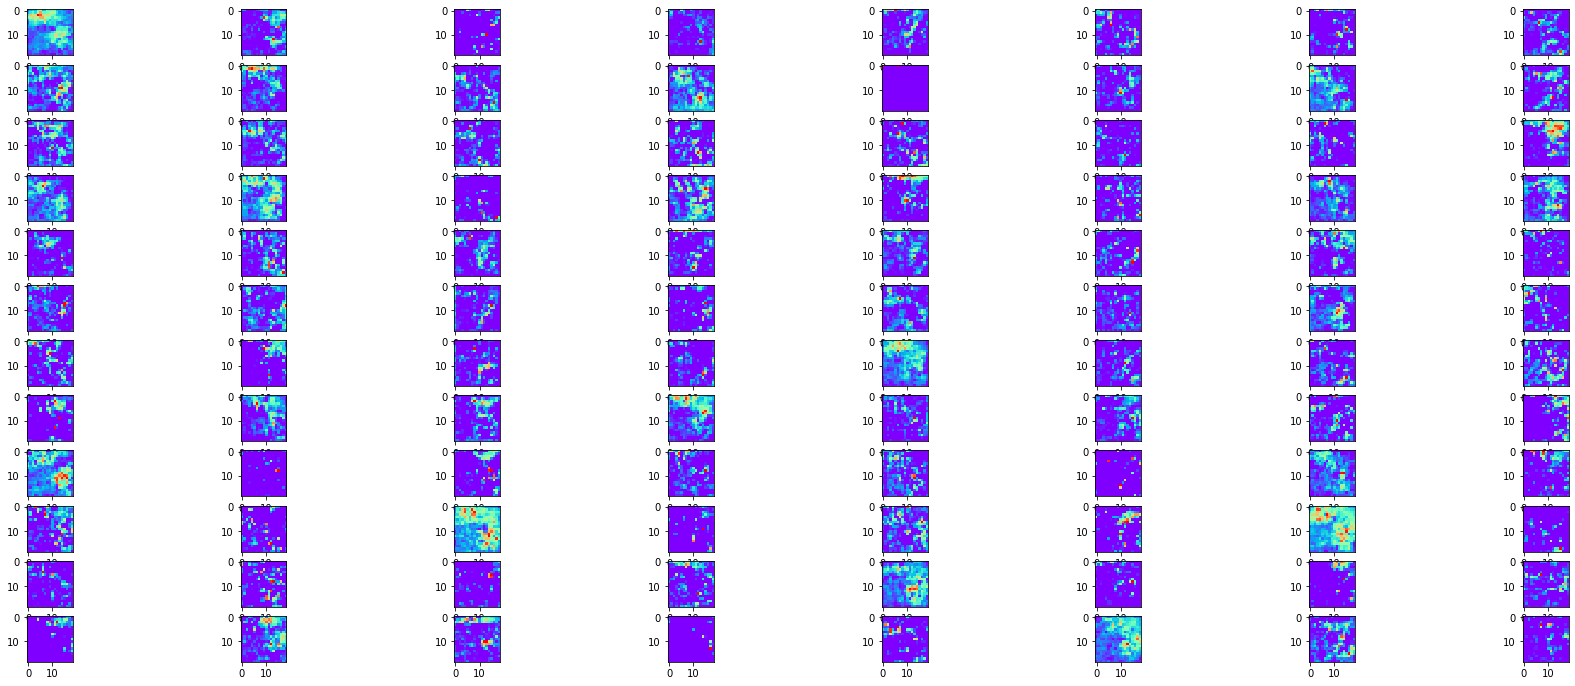

In [79]:
display_activation(activations, 8, 12, 5)

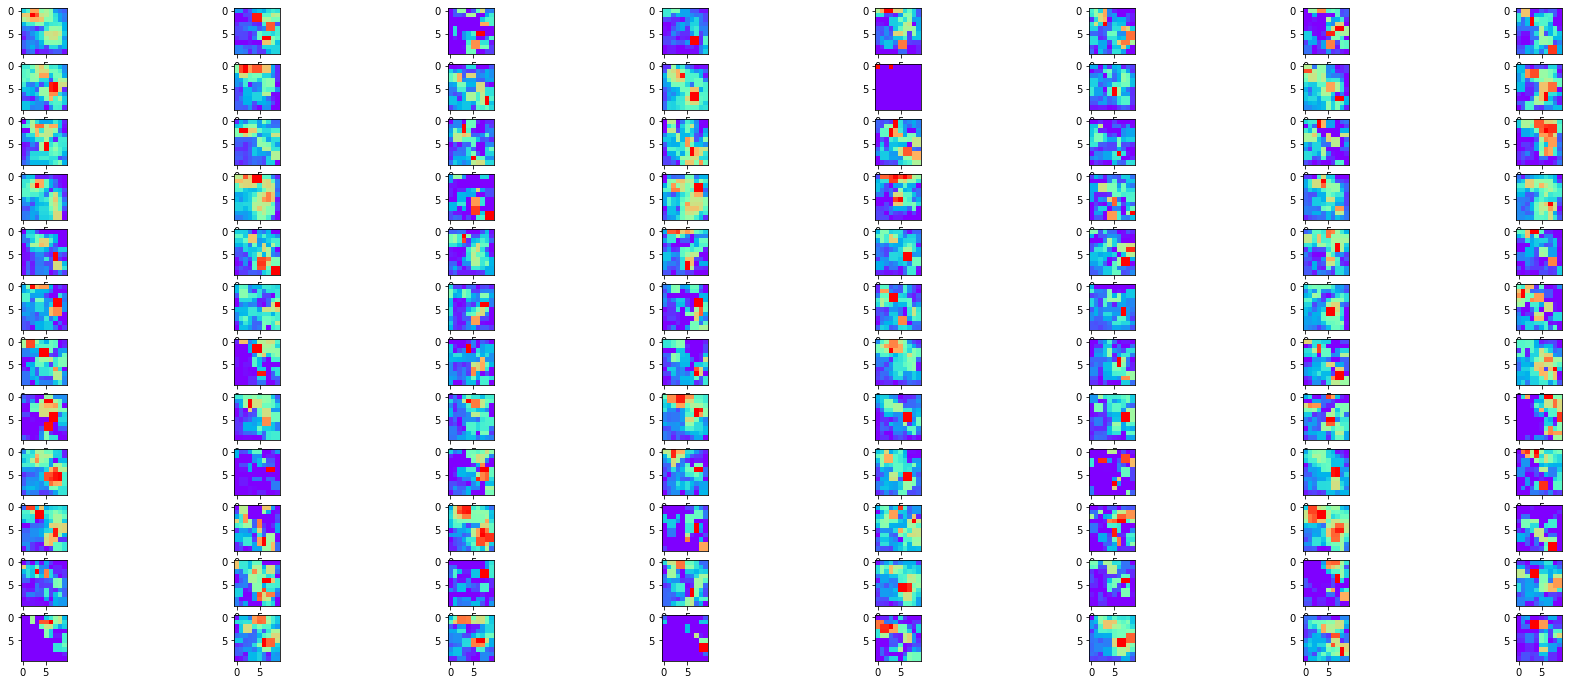

In [80]:
display_activation(activations, 8, 12, 6)

In [85]:
activations[11].shape

(1, 192)

In [87]:
activations[10].shape

(1, 10, 10, 192)

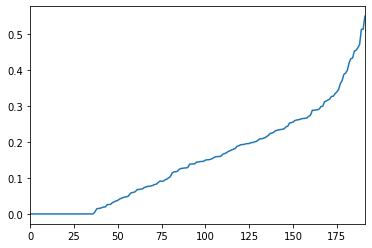

In [95]:
pd.Series(act_dense_3[0]).sort_values().reset_index(drop=True).plot()

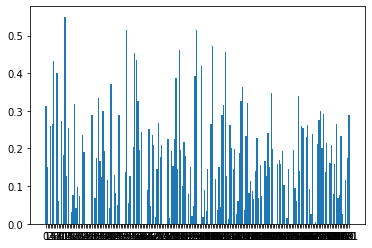

In [89]:
act_dense_3 = activations[11]
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

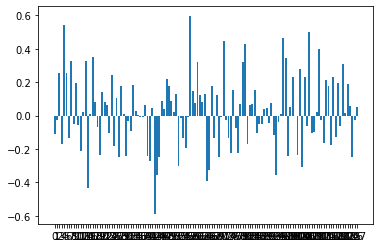

In [48]:
act_dense_3 = activations[12]
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

In [24]:
len(activations)

15

In [37]:
l1.shape

(13, 13, 48)

In [38]:
import seaborn as sns

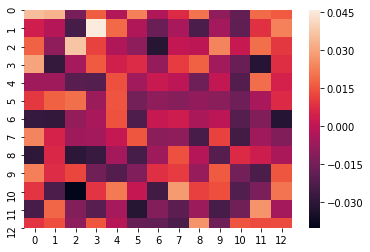

In [41]:
sns.heatmap(l1[:,:,3])